In [4]:
import dicom
import os
import numpy
from matplotlib import pyplot, cm
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
def dicomShow(volume, ref, plane=0,  title=None, margin=0.05, dpi=40, scale=2, interpolation=None ):
    """
    scale is a scaling factor for the shown image
    """
    nda = volume[:,:,plane]
    spacing = ref.PixelSpacing
    figsize = (scale + margin) * nda.shape[0] / dpi, (scale + margin) * nda.shape[1] / dpi
    extent = (0, nda.shape[1]*spacing[1], nda.shape[0]*spacing[0], 0)
    fig = plt.figure(figsize=figsize, dpi=dpi)
    ax = fig.add_axes([margin, margin, scale - 2*margin, scale - 2*margin])

    plt.set_cmap("gray")
    ax.imshow(nda,extent=extent,interpolation=interpolation)
    
    if title:
        plt.title(title)
    
    plt.show()

In [6]:
pathCT = "../data/cropped_CT/"
pathMR = "../data/cropped_MR-d/"

lstFilesCT = []  # create an empty list for CT files
for dirName, subdirList, fileList in os.walk(pathCT):
    for filename in fileList:
        if ".dcm" in filename.lower():  # check whether the file's DICOM
            lstFilesCT.append(os.path.join(dirName, filename))

lstFilesMR = []  # create an empty list for MR files
for dirName, subdirList, fileList in os.walk(pathMR):
    for filename in fileList:
        if ".dcm" in filename.lower():  # check whether the file's DICOM
            lstFilesMR.append(os.path.join(dirName, filename))

# Get ref file for CT images and one for MR
refCT = dicom.read_file(lstFilesCT[0])
refMR = dicom.read_file(lstFilesMR[0])

# Load dimensions based on the number of rows, columns, and slices (along the Z axis)
ConstPixelDimsCT = (int(refCT.Rows), int(refCT.Columns), len(lstFilesCT))
ConstPixelDimsMR = (int(refMR.Rows), int(refMR.Columns), len(lstFilesMR))

# Load spacing values (in mm)
ConstPixelSpacingCT = (float(refCT.PixelSpacing[0]),
                     float(refCT.PixelSpacing[1]),
                     float(refCT.SliceThickness))

ConstPixelSpacingMR = (float(refMR.PixelSpacing[0]),
                     float(refMR.PixelSpacing[1]),
                     float(refMR.SliceThickness))

In [8]:

xCT = numpy.arange(0.0, (ConstPixelDimsCT[0]+1)*ConstPixelSpacingCT[0], ConstPixelSpacingCT[0])
yCT = numpy.arange(0.0, (ConstPixelDimsCT[1]+1)*ConstPixelSpacingCT[1], ConstPixelSpacingCT[1])
zCT = numpy.arange(0.0, (ConstPixelDimsCT[2]+1)*ConstPixelSpacingCT[2], ConstPixelSpacingCT[2])

xMR = numpy.arange(0.0, (ConstPixelDimsMR[0]+1)*ConstPixelSpacingMR[0], ConstPixelSpacingMR[0])
yMR = numpy.arange(0.0, (ConstPixelDimsMR[1]+1)*ConstPixelSpacingMR[1], ConstPixelSpacingMR[1])
zMR = numpy.arange(0.0, (ConstPixelDimsMR[2]+1)*ConstPixelSpacingMR[2], ConstPixelSpacingMR[2])


# The array is sized based on 'ConstPixelDims'
ArrayDicomCT = numpy.zeros(ConstPixelDimsCT, dtype=refCT.pixel_array.dtype)

# loop through all the DICOM files
for filenameDCM in lstFilesCT:
    # read the file
    ds = dicom.read_file(filenameDCM)
    # store the raw image data
    ArrayDicomCT[:, :, lstFilesCT.index(filenameDCM)] = ds.pixel_array  


# The array is sized based on 'ConstPixelDims'
ArrayDicomMR = numpy.zeros(ConstPixelDimsMR, dtype=refMR.pixel_array.dtype)

# loop through all the DICOM files
for filenameDCM in lstFilesMR:
    # read the file
    ds = dicom.read_file(filenameDCM)
    # store the raw image data
    ArrayDicomMR[:, :, lstFilesMR.index(filenameDCM)] = ds.pixel_array  



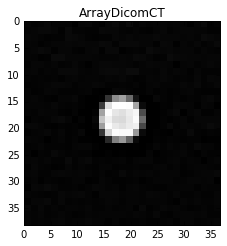

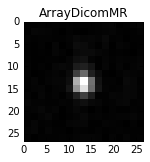

In [9]:
dicomShow(ArrayDicomCT, refCT, plane=10, title='ArrayDicomCT', interpolation='nearest')

dicomShow(ArrayDicomMR, refMR, plane=10, title='ArrayDicomMR', interpolation='nearest')